<a href="https://colab.research.google.com/github/GiovanniBorrelli/ClinicalDataSanitization/blob/main/MTanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/NLProject/mtsamples.csv", engine='python', on_bad_lines='skip')
df2 = pd.read_csv("/content/drive/MyDrive/NLProject/mtsamples100.csv", engine='python', on_bad_lines='skip')

print("Head of mtsamples.csv:")
display(df.head())

print("\nHead of mtsamples100.csv:")
display(df2.head())

Head of mtsamples.csv:


,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."



Head of mtsamples100.csv:


,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords;;;;;;;;;;;;;


/tmp/ipython-input-26-3088208161.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_specialties.values, y=top_specialties.index, palette="viridis")


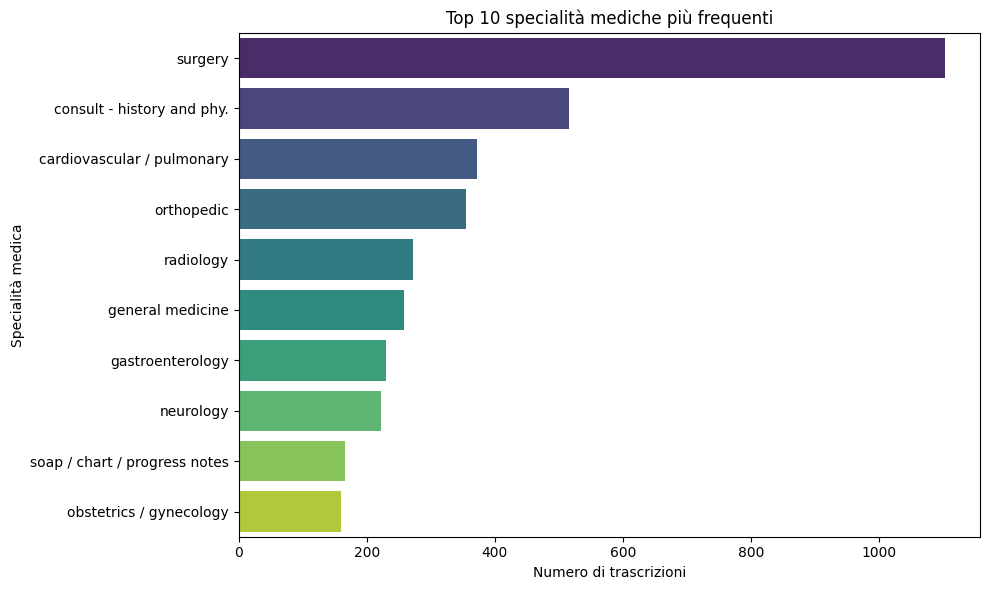

In [ ]:
# Pulizia della colonna medical_specialty
df['medical_specialty'] = df['medical_specialty'].astype(str).str.strip().str.lower()

# Calcolo delle 10 specialità più frequenti
top_specialties = df['medical_specialty'].value_counts().head(10)


# Pulizia della colonna medical_specialty
df2['medical_specialty'] = df2['medical_specialty'].astype(str).str.strip().str.lower()

# Calcolo delle 10 specialità più frequenti
top_specialties2 = df2['medical_specialty'].value_counts().head(10)

# Creazione del grafico
plt.figure(figsize=(10, 6))
sns.barplot(x=top_specialties.values, y=top_specialties.index, palette="viridis")
plt.xlabel("Numero di trascrizioni")
plt.ylabel("Specialità medica")
plt.title("Top 10 specialità mediche più frequenti")
plt.tight_layout()
plt.show()

In [ ]:
top_specialties_df = top_specialties.reset_index()
top_specialties_df.columns = ["Specialità medica", "Numero di trascrizioni"]
print(top_specialties_df.head(10))

               Specialità medica  Numero di trascrizioni
0                        surgery                    1103
1     consult - history and phy.                     516
2     cardiovascular / pulmonary                     372
3                     orthopedic                     355
4                      radiology                     273
5               general medicine                     259
6               gastroenterology                     230
7                      neurology                     223
8  soap / chart / progress notes                     166
9        obstetrics / gynecology                     160


In [ ]:
import pandas as pd
from collections import Counter

# Carica il CSV
df = pd.read_csv("mtsamples.csv")

# Crea una lista unica di tutte le keyword in tutte le righe (ignorando i NaN veri)
all_keywords = []

for row in df['keywords'].dropna():
    splitted = [kw.strip().lower() for kw in row.split(',') if kw.strip()]
    all_keywords.extend(splitted)

# Conta le frequenze con Counter
keyword_counts = Counter(all_keywords)

# Ordina le keyword per frequenza
sorted_keywords = keyword_counts.most_common()

# Convertili in DataFrame
keyword_df = pd.DataFrame(sorted_keywords, columns=["Keyword", "Frequenza"])

# Mostra le prime 20
print(keyword_df.head(20))

# Salva in CSV
keyword_df.to_csv("frequenze_keywords.csv", index=False)


FileNotFoundError: [Errno 2] No such file or directory: 'mtsamples.csv'

In [ ]:
import spacy

In [ ]:
!pip install scispacy
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.1/en_ner_bc5cdr_md-0.5.1.tar.gz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.2/120.2 MB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 100.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 917.4/917.4 kB 50.9 MB/s eta 0:00:00
  Created wheel for en_ner_bc5cdr_md: filename=en_ner_bc5cdr_md-0.5.1-py3-none-any.whl size=120217626 sha256=fe27c438ef193314180e55fede982c178e4e4585822790a0d2ca3b33cc15d7f7
  Stored in directory: /root/.cache/pip/wheels/b4/8d/fb/36403b97e0de3d4c3f81c95f9d22c423d90f542243a35d5350
Successfully built en_ner_bc5cdr_md
  Attempting uninstall: wasabi
    Found existing installation: wasabi 1.1.3
    Uninsta

In [ ]:
import spacy
nlp = spacy.load("en_ner_bc5cdr_md")

# Test veloce
doc = nlp("The patient was prescribed ibuprofen for her chronic migraines.")
print([(ent.text, ent.label_) for ent in doc.ents])


[('ibuprofen', 'CHEMICAL'), ('migraines', 'DISEASE')]


In [ ]:
# Carica il modello NER di spaCy (ad esempio 'en_core_web_sm', o uno medico se hai)
nlp = spacy.load("en_core_web_sm")

In [ ]:
import time
from tqdm import tqdm

# Prepara la lista testi, riempiendo eventuali NaN con stringhe vuote
texts = df['transcription'].fillna("").tolist()

start_time = time.time()

# Usa nlp.pipe con tqdm per mostrare la progress bar
docs = list(tqdm(nlp.pipe(texts, batch_size=50), total=len(texts)))

# Estrai entità
df['entities'] = [[(ent.text, ent.label_) for ent in doc.ents] for doc in docs]

end_time = time.time()
elapsed = end_time - start_time

print(f"Tempo totale per l'elaborazione di {len(texts)} trascrizioni: {elapsed:.2f} secondi")


100%|██████████| 4999/4999 [06:45<00:00, 12.32it/s]


Tempo totale per l'elaborazione di 4999 trascrizioni: 406.08 secondi


In [ ]:
# Converti la lista di tuple in stringa per poter salvare in CSV
df['entities'] = df['entities'].apply(lambda ents: "; ".join([f"{text} ({label})" for text, label in ents]))

# Salva in CSV
df.to_csv("mtsamples_with_entities.csv", index=False)

print("File salvato come 'mtsamples_with_entities_scispacy.csv'")


ValueError: not enough values to unpack (expected 2, got 1)

In [ ]:
print(df[['transcription', 'entities']].head())

                                       transcription  \
0  SUBJECTIVE:,  This 23-year-old white female pr...   
1  PAST MEDICAL HISTORY:, He has difficulty climb...   
2  HISTORY OF PRESENT ILLNESS: , I have seen ABC ...   
3  2-D M-MODE: , ,1.  Left atrial enlargement wit...   
4  1.  The left ventricular cavity size and wall ...   

                                            entities  
0  complaint of allergies, allergies, Claritin, Z...  
1  snoring, pains, knee pain, pain, ankle pain, g...  
2  weight loss, weight loss, alcohol, weight loss...  
3        atrial enlargement, pulmonary regurgitation  
4  hyperdynamic left ventricular systolic functio...  


In [ ]:
# Da lista di tuple, prendi solo il testo delle entità e uniscile con virgola
df['entities'] = df['entities'].apply(lambda ents: ", ".join([text for text, label in ents]))

# Crea un DataFrame con solo due colonne
result_df = df[['transcription', 'entities']]

# Salva in Excel
result_df.to_excel("trascriptions_entities.xlsx", index=False)

print("File Excel salvato come 'trascriptions_entities_scispacy.xlsx'")

ValueError: not enough values to unpack (expected 2, got 1)

In [ ]:
print(type(df['entities'].iloc[0]))
print(df['entities'].iloc[0])


<class 'str'>
complaint of allergies, allergies, Claritin, Zyrtec, asthma, Tri-Cyclen, throat, Allergic, Zyrtec, loratadine, Nasonex


In [ ]:
# Sostituisci i punti e virgola con virgole per uniformare la separazione
df['entities'] = df['entities'].str.replace(';', ',')

# Prendi solo le colonne necessarie
result_df = df[['transcription', 'entities']]

# Salva in Excel
result_df.to_excel("trascriptions_entities_unite_scispacy.xlsx", index=False)

print("File Excel salvato come 'trascriptions_entities_unite_scispacy.xlsx'")


File Excel salvato come 'trascriptions_entities_unite_scispacy.xlsx'


In [ ]:
!pip install transformers torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 70.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 22.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
from transformers import AutoTokenizer, AutoModelForTokenClassification, pipeline
import pandas as pd
from tqdm import tqdm

# Modello alternativo pubblico
model_name = "emilyalsentzer/Bio_ClinicalBERT"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForTokenClassification.from_pretrained(model_name)

# Pipeline NER
ner_pipeline = pipeline("ner", model=model, tokenizer=tokenizer, aggregation_strategy="simple")

# Carica dati
df = pd.read_csv("/content/drive/MyDrive/NLProject/mtsamples100.csv")
df['transcription'] = df['transcription'].fillna("")

# Applica NER con barra di progresso
tqdm.pandas()
df['entities'] = df['transcription'].progress_apply(
    lambda text: [(ent['word'], ent['entity_group']) for ent in ner_pipeline(text)]
)

# Unisci entità in una colonna stringa
df['entities'] = df['entities'].apply(lambda ents: ", ".join([f"{word} ({label})" for word, label in ents]))

# Salva solo due colonne
result_df = df[['transcription', 'entities']]
result_df.to_csv("mtsamples_clinicalbert_entities.csv", index=False)

print("✔️ File salvato come 'mtsamples_clinicalbert_entities.csv'")


Some weights of BertForTokenClassification were not initialized from the model checkpoint at emilyalsentzer/Bio_ClinicalBERT and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use cpu


ParserError: Error tokenizing data. C error: Expected 6 fields in line 10, saw 42


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/NLProject/mtsamples100.csv", engine='python', on_bad_lines='skip')
# Pulizia della colonna medical_specialty
df['medical_specialty'] = df['medical_specialty'].astype(str).str.strip().str.lower()

# Calcolo delle 10 specialità più frequenti
top_specialties = df['medical_specialty'].value_counts().head(10)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/NLProject/mtsamples100.csv'

In [ ]:
import pandas as pd

# Leggi il file CSV completo
df = pd.read_csv('/content/drive/MyDrive/NLProject/mtsamples.csv')

# Mantieni solo le prime 100 righe
df_first_30 = df.iloc[:30]

# Salva il file filtrato (puoi sovrascrivere lo stesso file o salvarne uno nuovo)
df_first_30.to_csv('mtsamples_first_30.csv', index=False)



In [ ]:
df = pd.read_csv('/content/drive/MyDrive/NLProject/mtsamples_first_30.csv')

In [ ]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForTokenClassification, pipeline
from tqdm import tqdm

# Carica il modello ClinicalBERT
model_name = "emilyalsentzer/Bio_ClinicalBERT"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForTokenClassification.from_pretrained(model_name, num_labels=2)

# Crea la pipeline con aggregazione e TRONCAMENTO ABILITATO
ner_pipeline = pipeline("ner", model=model, tokenizer=tokenizer, aggregation_strategy="simple", device=0 if torch.cuda.is_available() else -1)

# Funzione per segmentare testo lungo
def split_text(text, max_tokens=512):
    # Ensure the input is a string
    text = str(text)
    tokens = tokenizer.tokenize(text)
    chunks = []
    for i in range(0, len(tokens), max_tokens):
        chunk_tokens = tokens[i:i+max_tokens]
        chunk_text = tokenizer.convert_tokens_to_string(chunk_tokens)
        chunks.append(chunk_text)
    return chunks

# Funzione per eseguire NER su blocchi e aggregare risultati
def extract_entities(text):
    chunks = split_text(text)
    entities = []
    for chunk in chunks:
        try:
            # Pass the chunk as a list containing a single string
            ents = ner_pipeline([chunk])
            # Since we pass a list with one element, the result is a list containing one list of entities
            entities.extend([(ent['word'], ent['entity_group']) for ent in ents[0]])
        except Exception:
            continue
    return entities

# Applica NER con barra di caricamento
tqdm.pandas()
df['entities'] = df['transcription'].progress_apply(extract_entities)

# Prepara la colonna finale con entità formattate
df['entities'] = df['entities'].apply(lambda ents: ", ".join([f"{word} ({label})" for word, label in ents]))

# Salva solo due colonne in CSV
df[['transcription', 'entities']].to_csv("clinicalbert_entities.csv", index=False)

print("✅ File salvato come 'clinicalbert_entities.csv'")

Some weights of BertForTokenClassification were not initialized from the model checkpoint at emilyalsentzer/Bio_ClinicalBERT and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use cpu
100%|██████████| 100/100 [02:07<00:00,  1.28s/it]

✅ File salvato come 'clinicalbert_entities.csv'


In [ ]:
import pandas as pd
from transformers import pipeline

# Carica pipeline NER clinico
ner_pipeline = pipeline("ner", model="nlpie/bio-ner", aggregation_strategy="simple")

# Lista di trascrizioni di esempio (puoi sostituirla con il tuo DataFrame)
transcripts = [
    "This 23-year-old white female presents with complaint of allergies. She used to have allergies when she lived in Seattle...",
    # Aggiungi altre trascrizioni qui
]

data = []
for text in transcripts:
    ents = ner_pipeline(text)
    # Crea una lista di entità in formato "entità (tipo)"
    entities_list = [f"{ent['word']} ({ent['entity_group']})" for ent in ents]
    # Unisci in stringa separata da virgola
    entities_str = ", ".join(entities_list)
    data.append({"Transcript": text, "Entities": entities_str})

# Crea DataFrame
df = pd.DataFrame(data)

# Salva in Excel
df.to_excel("clinical_ner_output.xlsx", index=False)

print("File Excel creato: clinical_ner_output.xlsx")


OSError: nlpie/bio-ner is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo either by logging in with `huggingface-cli login` or by passing `token=<your_token>`

In [ ]:
from transformers import pipeline

# Esempio di modello pubblico per NER medico senza token
model_name = "dslim/bert-base-NER"  # modello generale NER, non specifico clinico, ma funziona senza token

ner_pipeline = pipeline("ner", model=model_name, tokenizer=model_name, aggregation_strategy="simple")

text = "Your clinical text here"

entities = ner_pipeline(text)
print(entities)


config.json:   0%|          | 0.00/829 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/433M [00:00<?, ?B/s]

Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


[]


In [ ]:

from transformers import AutoModelForTokenClassification, AutoTokenizer
import torch

model_name = "pabRomero/BioBERT-full-finetuned-ner-pablo"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForTokenClassification.from_pretrained(model_name)

text = ("Patient John Doe, a 54-year-old male from Seattle, "
        "was diagnosed with diabetes mellitus and hypertension. "
        "He is currently taking Metformin and Lisinopril.")

inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)

with torch.no_grad():
    outputs = model(**inputs)
logits = outputs.logits
predictions = torch.argmax(logits, dim=2)

tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])
labels = [model.config.id2label[p.item()] for p in predictions[0]]

# Funzione per ricostruire le parole dai token subword e associare le label
def aggregate_entities(tokens, labels):
    aggregated_tokens = []
    aggregated_labels = []
    current_word = ""
    current_label = None
    for token, label in zip(tokens, labels):
        if token.startswith("##"):
            current_word += token[2:]
        else:
            if current_word:
                aggregated_tokens.append(current_word)
                aggregated_labels.append(current_label)
            current_word = token
            current_label = label
    # Aggiungi l'ultima parola
    if current_word:
        aggregated_tokens.append(current_word)
        aggregated_labels.append(current_label)
    return aggregated_tokens, aggregated_labels

agg_tokens, agg_labels = aggregate_entities(tokens, labels)

entities = [(t, l) for t, l in zip(agg_tokens, agg_labels) if l != "O"]

print("Entità riconosciute:")
for token, label in entities:
    print(f"{token}: {label}")


Entità riconosciute:
diabetes: B-Reason
mellitus: I-Reason
hypertension: B-Reason
metformin: B-Drug
lisinopril: B-Drug


In [ ]:
from transformers import pipeline
from tqdm import tqdm
import pandas as pd

model_name = "sciarrilli/biobert-base-cased-v1.2-finetuned-ner"

# Create NER pipeline with aggregation (group tokens into entities)
ner = pipeline("ner", model=model_name, aggregation_strategy="simple")

# Example data
df = pd.DataFrame({
    "transcription": [
        "Patient is a 45-year-old male diagnosed with diabetes mellitus and hypertension.",
        "Currently taking metformin and lisinopril."
    ]
})

tqdm.pandas()

def extract_entities(text):
    results = ner(text)
    entities = []
    for ent in results:
        label = ent.get("entity_group") or ent.get("entity")
        word = ent["word"].replace("##", "")
        entities.append(f"{word}({label})")
    return ", ".join(entities)

df['entities'] = df['transcription'].progress_apply(extract_entities)

df.to_excel("output_entities.xlsx", index=False)

print(df)


config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/431M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/359 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/431M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu

  0%|          | 0/2 [00:00<?, ?it/s]Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.

100%|██████████| 2/2 [00:00<00:00,  7.85it/s]

                                       transcription  \
0  Patient is a 45-year-old male diagnosed with d...   
1         Currently taking metformin and lisinopril.   

                                            entities  
0  patient is a 45 - year - old male diagnosed wi...  
1  currently taking metformin and lisinopril.(LAB...  


In [ ]:
from transformers import pipeline
from tqdm import tqdm
import pandas as pd

df = pd.DataFrame({
    "transcription": [
        "Patient is a 45-year-old male diagnosed with diabetes.",
        "Currently taking metformin and lisinopril."
    ]
})

# Usa la pipeline NER SENZA aggregation_strategy, per avere output token-level
ner_pipeline = pipeline("ner", model="sciarrilli/biobert-base-cased-v1.2-finetuned-ner", aggregation_strategy=None)

def aggregate_ents(ner_results):
    ents = []
    current_ent = None

    for token_info in ner_results:
        word = token_info['word']
        label = token_info['entity']

        if label.startswith('B-'):  # inizio entità
            if current_ent:
                ents.append(current_ent)
            current_ent = {'entity': label[2:], 'word': word}
        elif label.startswith('I-') and current_ent and label[2:] == current_ent['entity']:
            # continua entità
            # se token inizia con ## (subword), lo aggiungo senza spazio
            if word.startswith("##"):
                current_ent['word'] += word[2:]
            else:
                current_ent['word'] += " " + word
        else:
            # label O o entità nuova che non segue correttamente I-
            if current_ent:
                ents.append(current_ent)
                current_ent = None
    # aggiungo ultima entità
    if current_ent:
        ents.append(current_ent)
    return ents

def format_entities(entities):
    return ", ".join([f"{ent['word']}({ent['entity']})" for ent in entities])

tqdm.pandas()

def extract_entities(text):
    ner_results = ner_pipeline(text)
    ents = aggregate_ents(ner_results)
    return format_entities(ents)

df['entities'] = df['transcription'].progress_apply(extract_entities)

for idx, row in df.iterrows():
    print(f"Trascritto {idx}:")
    print(row['transcription'])
    print("Entità riconosciute:")
    print(row['entities'])
    print("-" * 40)


Device set to use cpu
100%|██████████| 2/2 [00:00<00:00,  3.15it/s]

Trascritto 0:
Patient is a 45-year-old male diagnosed with diabetes.
Entità riconosciute:

----------------------------------------
Trascritto 1:
Currently taking metformin and lisinopril.
Entità riconosciute:

----------------------------------------


In [ ]:
from transformers import AutoTokenizer, AutoModelForTokenClassification, pipeline

def check_labels(model):
    id2label = model.config.id2label
    print("Label map:")
    for i, label in id2label.items():
        print(f"{i}: {label}")
    # Controllo semplice: ci aspettiamo label che NON siano solo LABEL_0, LABEL_1 ecc
    generic_labels = all(label.startswith("LABEL_") for label in id2label.values())
    if generic_labels:
        raise ValueError("Warning: le label sono generiche (LABEL_0, LABEL_1, ...). Cambia modello!")

def ner_biobert(texts):
    model_name = "d4data/biomedical-ner-all"  # modello pubblico e con label esplicite
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForTokenClassification.from_pretrained(model_name)

    check_labels(model)  # controllo label

    ner_pipeline = pipeline(
        "ner",
        model=model,
        tokenizer=tokenizer,
        aggregation_strategy="simple",  # per unire token in entità complete
        device=-1  # CPU
    )

    for idx, text in enumerate(texts):
        print(f"Trascritto {idx}:")
        print(text)
        entities = ner_pipeline(text)
        if not entities:
            print("Entità riconosciute: nessuna")
        else:
            print("Entità riconosciute:")
            for ent in entities:
                print(f"{ent['entity_group']}:\t{ent['word']} (score: {ent['score']:.3f})")
        print("-" * 40)

if __name__ == "__main__":
    # Test con due frasi
    trascritti = [
        "Patient was prescribed aspirin and diagnosed with hypertension.",
        "Currently taking metformin and lisinopril."
    ]
    ner_biobert(trascritti)


tokenizer_config.json:   0%|          | 0.00/373 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/5.00k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/266M [00:00<?, ?B/s]

Device set to use cpu


Label map:
0: O
1: B-Activity
2: B-Administration
3: B-Age
4: B-Area
5: B-Biological_attribute
6: B-Biological_structure
7: B-Clinical_event
8: B-Color
9: B-Coreference
10: B-Date
11: B-Detailed_description
12: B-Diagnostic_procedure
13: B-Disease_disorder
14: B-Distance
15: B-Dosage
16: B-Duration
17: B-Family_history
18: B-Frequency
19: B-Height
20: B-History
21: B-Lab_value
22: B-Mass
23: B-Medication
24: B-Non[biological](Detailed_description
25: B-Nonbiological_location
26: B-Occupation
27: B-Other_entity
28: B-Other_event
29: B-Outcome
30: B-Personal_[back](Biological_structure
31: B-Personal_background
32: B-Qualitative_concept
33: B-Quantitative_concept
34: B-Severity
35: B-Sex
36: B-Shape
37: B-Sign_symptom
38: B-Subject
39: B-Texture
40: B-Therapeutic_procedure
41: B-Time
42: B-Volume
43: B-Weight
44: I-Activity
45: I-Administration
46: I-Age
47: I-Area
48: I-Biological_attribute
49: I-Biological_structure
50: I-Clinical_event
51: I-Color
52: I-Coreference
53: I-Date
54: I-De

In [ ]:
from transformers import AutoTokenizer, AutoModelForTokenClassification, pipeline
import re

def check_labels(model):
    id2label = model.config.id2label
    print("Label map:")
    for i, label in id2label.items():
        print(f"{i}: {label}")
    generic_labels = all(label.startswith("LABEL_") for label in id2label.values())
    if generic_labels:
        raise ValueError("Warning: le label sono generiche (LABEL_0, LABEL_1, ...). Cambia modello!")

def reconstruct_entities(tokens):
    """
    Ricostruisce le entità dai token con tag BIO.
    tokens: lista di dict con keys 'word', 'entity', 'score'
    """
    entities = []
    current_ent = None

    for token in tokens:
        word = token['word']
        label = token['entity']
        score = token['score']

        if label == 'O':
            if current_ent:
                entities.append(current_ent)
                current_ent = None
            continue

        prefix = label[:2]  # B- o I-
        ent_type = label[2:]  # tipo entità es. Medication

        if prefix == 'B-':
            if current_ent:
                entities.append(current_ent)
            current_ent = {
                'entity': ent_type,
                'word': word,
                'score': score
            }
        elif prefix == 'I-' and current_ent and current_ent['entity'] == ent_type:
            # Unisco i token (gestisco spazi e ## per wordpiece)
            if word.startswith("##"):
                current_ent['word'] += word[2:]
            else:
                current_ent['word'] += " " + word
            # aggiorno score al minimo tra i token (più prudente)
            current_ent['score'] = min(current_ent['score'], score)
        else:
            # Nuova entità o errore BIO, chiudo precedente se esiste
            if current_ent:
                entities.append(current_ent)
            current_ent = {
                'entity': ent_type,
                'word': word,
                'score': score
            }
    if current_ent:
        entities.append(current_ent)
    return entities

def ner_biobert(texts):
    model_name = "d4data/biomedical-ner-all"
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForTokenClassification.from_pretrained(model_name)

    check_labels(model)

    ner_pipeline = pipeline(
        "ner",
        model=model,
        tokenizer=tokenizer,
        aggregation_strategy=None,  # NO aggregazione automatica
        device=-1
    )

    for idx, text in enumerate(texts):
        print(f"Trascritto {idx}:")
        print(text)
        tokens = ner_pipeline(text)
        entities = reconstruct_entities(tokens)
        if not entities:
            print("Entità riconosciute: nessuna")
        else:
            print("Entità riconosciute:")
            for ent in entities:
                print(f"{ent['entity']}:\t{ent['word']} (score: {ent['score']:.3f})")
        print("-" * 40)

if __name__ == "__main__":
    trascritti = [
        "This 23-year-old white female presents with complaint of allergies.  She used to have allergies when she lived in Seattle but she thinks they are worse here.  In the past, she has tried Claritin, and Zyrtec.  Both worked for short time but then seemed to lose effectiveness.  She has used Allegra also.  She used that last summer and she began using it again two weeks ago.  It does not appear to be working very well.  She has used over-the-counter sprays but no prescription nasal sprays.  She does have asthma but doest not require daily medication for this and does not think it is flaring up.,MEDICATIONS: , Her only medication currently is Ortho Tri-Cyclen and the Allegra.,ALLERGIES: , She has no known medicine allergies.,OBJECTIVE:,Vitals:  Weight was 130 pounds and blood pressure 124/78.,HEENT:  Her throat was mildly erythematous without exudate.  Nasal mucosa was erythematous and swollen.  Only clear drainage was seen.  TMs were clear.,Neck:  Supple without adenopathy.,Lungs:  Clear.,ASSESSMENT:,  Allergic rhinitis.,PLAN:,1.  She will try Zyrtec instead of Allegra again.  Another option will be to use loratadine.  She does not think she has prescription coverage so that might be cheaper.,2.  Samples of Nasonex two sprays in each nostril given for three weeks.  A prescription was written as well."
    ]
    ner_biobert(trascritti)


Device set to use cpu


Label map:
0: O
1: B-Activity
2: B-Administration
3: B-Age
4: B-Area
5: B-Biological_attribute
6: B-Biological_structure
7: B-Clinical_event
8: B-Color
9: B-Coreference
10: B-Date
11: B-Detailed_description
12: B-Diagnostic_procedure
13: B-Disease_disorder
14: B-Distance
15: B-Dosage
16: B-Duration
17: B-Family_history
18: B-Frequency
19: B-Height
20: B-History
21: B-Lab_value
22: B-Mass
23: B-Medication
24: B-Non[biological](Detailed_description
25: B-Nonbiological_location
26: B-Occupation
27: B-Other_entity
28: B-Other_event
29: B-Outcome
30: B-Personal_[back](Biological_structure
31: B-Personal_background
32: B-Qualitative_concept
33: B-Quantitative_concept
34: B-Severity
35: B-Sex
36: B-Shape
37: B-Sign_symptom
38: B-Subject
39: B-Texture
40: B-Therapeutic_procedure
41: B-Time
42: B-Volume
43: B-Weight
44: I-Activity
45: I-Administration
46: I-Age
47: I-Area
48: I-Biological_attribute
49: I-Biological_structure
50: I-Clinical_event
51: I-Color
52: I-Coreference
53: I-Date
54: I-De

In [ ]:
from transformers import AutoTokenizer, AutoModelForTokenClassification, pipeline

def check_labels(model):
    id2label = model.config.id2label
    print("Label map:")
    for i, label in id2label.items():
        print(f"{i}: {label}")
    generic_labels = all(label.startswith("LABEL_") for label in id2label.values())
    if generic_labels:
        raise ValueError("Warning: le label sono generiche (LABEL_0, LABEL_1, ...). Cambia modello!")

def ner_biobert(texts):
    model_name = "d4data/biomedical-ner-all"
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForTokenClassification.from_pretrained(model_name)

    check_labels(model)

    # Aggregazione corretta e robusta
    ner_pipeline = pipeline("ner", model=model, tokenizer=tokenizer, aggregation_strategy="first")

    for idx, text in enumerate(texts):
        print(f"Trascritto {idx}:")
        print(text)
        tokens = ner_pipeline(text)

        if not tokens:
            print("Entità riconosciute: nessuna")
        else:
            print("Entità riconosciute:")
            for ent in tokens:
                print(f"{ent['entity_group']}:\t{ent['word']} (score: {ent['score']:.3f})")
        print("-" * 40)

if __name__ == "__main__":
    trascritti = [
        "This 23-year-old white female presents with complaint of allergies.  She used to have allergies when she lived in Seattle but she thinks they are worse here.  In the past, she has tried Claritin, and Zyrtec.  Both worked for short time but then seemed to lose effectiveness.  She has used Allegra also.  She used that last summer and she began using it again two weeks ago.  It does not appear to be working very well.  She has used over-the-counter sprays but no prescription nasal sprays.  She does have asthma but does not require daily medication for this and does not think it is flaring up.,MEDICATIONS: , Her only medication currently is Ortho Tri-Cyclen and the Allegra.,ALLERGIES: , She has no known medicine allergies.,OBJECTIVE:,Vitals:  Weight was 130 pounds and blood pressure 124/78.,HEENT:  Her throat was mildly erythematous without exudate.  Nasal mucosa was erythematous and swollen.  Only clear drainage was seen.  TMs were clear.,Neck:  Supple without adenopathy.,Lungs:  Clear.,ASSESSMENT:,  Allergic rhinitis.,PLAN:,1.  She will try Zyrtec instead of Allegra again.  Another option will be to use loratadine.  She does not think she has prescription coverage so that might be cheaper.,2.  Samples of Nasonex two sprays in each nostril given for three weeks.  A prescription was written as well."
    ]
    ner_biobert(trascritti)


Device set to use cpu


Label map:
0: O
1: B-Activity
2: B-Administration
3: B-Age
4: B-Area
5: B-Biological_attribute
6: B-Biological_structure
7: B-Clinical_event
8: B-Color
9: B-Coreference
10: B-Date
11: B-Detailed_description
12: B-Diagnostic_procedure
13: B-Disease_disorder
14: B-Distance
15: B-Dosage
16: B-Duration
17: B-Family_history
18: B-Frequency
19: B-Height
20: B-History
21: B-Lab_value
22: B-Mass
23: B-Medication
24: B-Non[biological](Detailed_description
25: B-Nonbiological_location
26: B-Occupation
27: B-Other_entity
28: B-Other_event
29: B-Outcome
30: B-Personal_[back](Biological_structure
31: B-Personal_background
32: B-Qualitative_concept
33: B-Quantitative_concept
34: B-Severity
35: B-Sex
36: B-Shape
37: B-Sign_symptom
38: B-Subject
39: B-Texture
40: B-Therapeutic_procedure
41: B-Time
42: B-Volume
43: B-Weight
44: I-Activity
45: I-Administration
46: I-Age
47: I-Area
48: I-Biological_attribute
49: I-Biological_structure
50: I-Clinical_event
51: I-Color
52: I-Coreference
53: I-Date
54: I-De